Movie recommender system

Recommder system is essentially a system used to give suggestions of products or items that are in line with a user interest.in this notebook, we are going to develop a movie recomender algorithm that will suggest movies to a user depending on the genre that one likes to watch.

this dataset can be found on www.kaggle.com 

In [ ]:
#  importing prerequisite libararies
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
# uploading our dataset from a local directory
df = pd.read_csv(r'C:\Users\test\Downloads\Netflix.csv')
# displaying the contents
df.head()

show_id     type                                      title        director  \
0      s1  TV Show                                         3%             NaN   
1     s10    Movie                                       1920    Vikram Bhatt   
2    s100    Movie                                 3 Heroines  Iman Brotoseno   
3   s1000    Movie  Blue Mountain State: The Rise of Thadland    Lev L. Spiro   
4   s1001  TV Show                             Blue Planet II             NaN   

                                                cast         country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...          Brazil   
1  Rajneesh Duggal, Adah Sharma, Indraneil Sengup...           India   
2  Reza Rahadian, Bunga Citra Lestari, Tara Basro...       Indonesia   
3  Alan Ritchson, Darin Brooks, James Cade, Rob R...   United States   
4                                 David Attenborough  United Kingdom   

  date_added  release_year rating  duration  \
0  14-Aug-20          2020  TV-MA         4   
1  15-Dec-17          2008  TV-MA       143   
2  05-Jan-19          2016  TV-PG       124   
3  01-Mar-16          2016      R        90   
4  03-Dec-18          2017   TV-G         1   

                                              genres  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1     Horror Movies, International Movies, Thrillers   
2        Dramas, International Movies, Sports Movies   
3                                           Comedies   
4  British TV Shows, Docuseries, Science & Nature TV   

                                         description  
0  In a future where the elite inhabit an island ...  
1  An architect and his wife move into a castle t...  
2  Three Indonesian women break records by becomi...  
3  New NFL star Thad buys his old teammates' belo...  
4  This sequel to the award-winning nature series...

In [3]:
# shape of the dataset
df.shape

(7787, 12)

our dataset has 7787 rows and 12 columns

Data analysis

In [4]:
# missing values
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
genres             0
description        0
dtype: int64

our dataset has 5 columsn that have null entries i.e director = 2389 entries, cast=718 entries, country= 507 entries, date_added=10 entries and rating = 7 entries.

we will need to fill them with either empty space or the most common entrie

In [5]:
# filling null values
df['cast'] = df['cast'].fillna('')
df['country'] = df['country'].fillna('')
df['director'] = df['director'].fillna('')
df['date_added'] = df['date_added'].fillna("15-dec-17")
df['rating'] = df['rating'].fillna(2)

In [6]:
# checking if there is any null value left
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
genres          0
description     0
dtype: int64

well our data now is clean since there are no null values left.

In [7]:
# 
df.type.value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

Data visualisation

<AxesSubplot:xlabel='type', ylabel='count'>

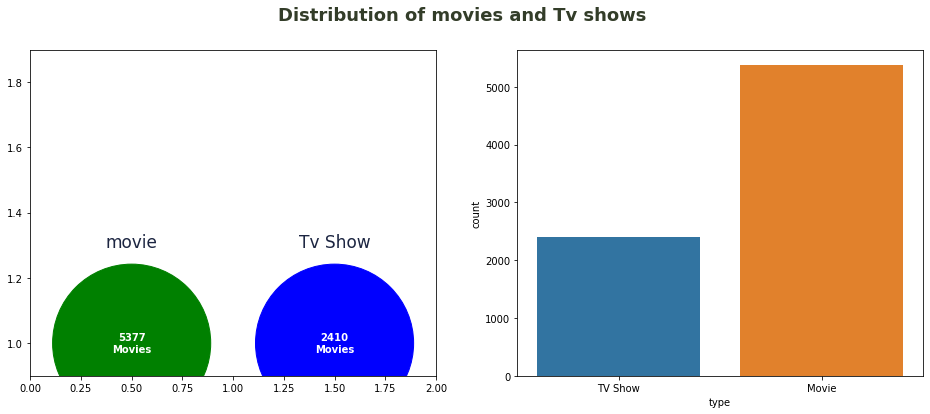

In [8]:
plt.figure(figsize=(16, 6))
plt.subplot(121)
plt.scatter(x=[0.5,1.5], y=[1, 1],s=25000, color = ['green', 'blue'])
plt.xlim(0,2)
plt.ylim(0.9, 1.9)
plt.suptitle('Distribution of movies and Tv shows', fontsize=18, weight=600, color='#333d29')
plt.text(0.5, 1, "{}\nMovies".format(str(len(df[df['type']=="Movie"]))), va='center', ha='center',weight=600,color='white')
plt.text(1.5, 1, "{}\nMovies".format(str(len(df[df['type']=='TV Show']))), va='center',ha='center',weight=600,color='white')
plt.text(0.5, 1.31, 'movie', va='center', ha='center', fontsize=17, weight=500, color='#1c2541')
plt.text(1.5, 1.31, 'Tv Show', va='center', ha='center', fontsize=17, weight=500, color='#1c2541')
plt.subplot(122)
sns.countplot(x=df['type'])


from the above bar plot we can see that movie has a high bar compared to Tv show. The pie plots above shows that Movies has 5377 entries and Tv show have 2410 entries.

Conclusion. Most netflix programs are Movies compared to Tv shows. Movies are almost twice Tv shows.

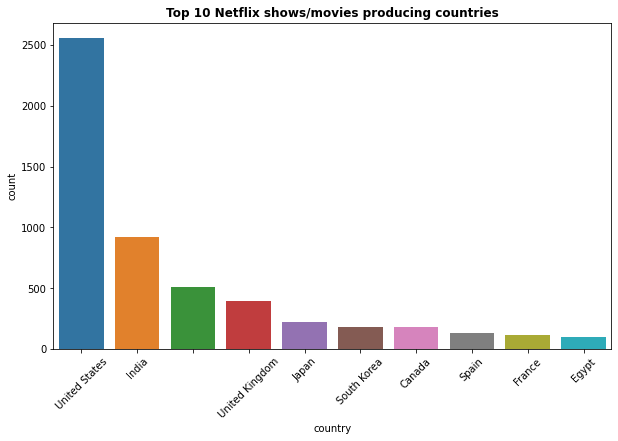

In [9]:
plt.figure(figsize=(10, 6))
locations = sns.countplot(data=df, x='country', order=df['country'].value_counts().index[:10])
locations.set_xticklabels(locations.get_xticklabels(), rotation=45)
plt.title("Top 10 Netflix shows/movies producing countries", fontdict={"color": "black", "fontsize":12, "weight": 600})
plt.show()

The above plot shows that United States have the highest bar, follwed by india and UK. Egypt has the lowest bar among top 10 movies/shows producing countries

conclusion: United states has the highest bar since companies that produce shows are well funded, produce high quality shows and general acceptability of shows by the masses.India shows have been gaining popularity too.

Egypt has the lowest bar because probably they have few shows producing countries which are not well funded and lack of popularity of shows from that region.

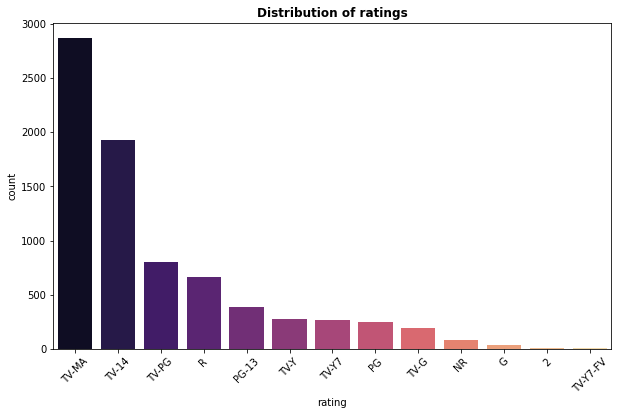

In [10]:
plt.figure(figsize=(10, 6))
rating = sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index[:13], palette='magma')
rating.set_xticklabels(rating.get_xticklabels(), rotation=45)
plt.title("Distribution of ratings", weight=600, fontsize=12)
plt.show()

Programs that were rated TV-MA had the highest bar, followed by TV-14 while shows rated TV-Y7-Fv had the lowest bars.

conclusion: it seems most viewers preferred shows rated TV-MA while TV-14.Shows that were rated TV-Y7-FV had the lowest viewers thus prompting the producing comapnies to produce few of them

In [11]:
# variables datatypes in our dataset
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration         int64
genres          object
description     object
dtype: object

Now we want to see how movies and TV-shows were distributed from 2008 to 2023

In [12]:
# converting date added from an object into datetime
df['date_added'] = pd.to_datetime(df['date_added'])
df['Date'] = df['date_added'].apply(lambda x: x.date())
movies_added = df.groupby(df['Date']).count()['type']
movies_added = movies_added.reset_index()
movies_added.head()

Date  type
0  2008-01-01     1
1  2008-02-04     1
2  2009-05-05     1
3  2009-11-18     1
4  2010-11-01     1

Text(0.5, 1.0, 'Distribution of movies released from 2008 to 2020')

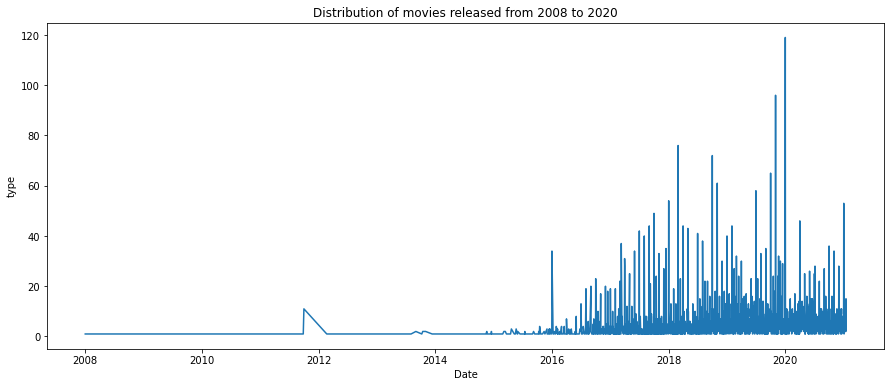

In [13]:
# Visualizing distribution of movies and shows in relation to date added
plt.figure(figsize=(15, 6))
sns.lineplot(data=movies_added, x='Date', y='type')
plt.title("Distribution of movies released from 2008 to 2020")

The above lineplot is fairly constant from 2008 to late 2015 where it starts to have massive spikes upto 2022. 2020 has the highest rise in movie added

conclusion: from 2008 to 2015  the number of shows added were almost the same but starting from 2016 there was a rise in the number of viewers with 2020 showing a peak in movie that were added.This might have been caused by people working or staying at home because of lockdown thus increasing the hours they spend on netflix thus the high number of movie added.

(-1.25, 1.25, -1.25, 1.25)

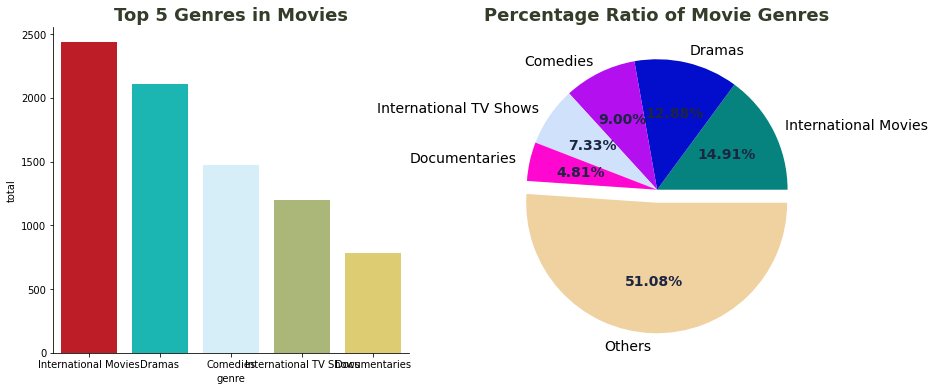

In [14]:
from collections import Counter
genres_list = []
for i in df['genres']:
    genres_list.extend(i.split(', '))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

df_plot = pd.DataFrame(Counter(genres_list).most_common(5), columns=['genre', 'total'])
ax = sns.barplot(data=df_plot, x='genre', y='total', ax=axes[0], palette=['#d6030e', '#02cecb', '#d0f0fc', '#b0c16e', '#f0d861'])
ax.set_title('Top 5 Genres in Movies', fontsize=18, weight=600, color='#333d29')
sns.despine()

df_plot_full = pd.DataFrame([Counter(genres_list)]).transpose().sort_values(by=0, ascending=False)
df_plot.loc[len(df_plot)] = {'genre': 'Others', 'total':df_plot_full[6:].sum()[0]}
plt.title('Percentage Ratio of Movie Genres', fontsize=18, weight=600, color='#333d29')
wedges, texts, autotexts = axes[1].pie(x=df_plot['total'], labels=df_plot['genre'], autopct='%.2f%%',
                                       textprops=dict(fontsize=14), explode=[0,0,0,0,0,0.1], colors=['#06837f', '#020ecb', '#b40fef', '#d0e1fc', '#fe08d1', '#f0d1a0'])

for autotext in autotexts:
    autotext.set_color('#1c2541')
    autotext.set_weight('bold')

axes[1].axis('off')

The above barplot shows International movies had the highest bar, follwed by Dramas with Documentaries having the lowest bar while

the pie chart shows that genres considered Others had the highest percentage of 51.08%,follwed by International movies with 14.91% wile Documentaries had the lowest percentage of 4.81%

Conclusion: The above plots shows  that besides others International movies were the most added or viewed, follwed by Dramas with Documentries being the least viewed or added into the netflix.

In [16]:
# replacing 3 inconsequantial ratings with few entries into one with a larger number of entries
df['rating'].replace([2, 'TV-Y7-FV', 'NC-17'],'UR', inplace=True)

In [17]:
df.rating.value_counts()

TV-MA    2863
TV-14    1931
TV-PG     806
R         665
PG-13     386
TV-Y      280
TV-Y7     271
PG        247
TV-G      194
NR         84
G          39
UR         21
Name: rating, dtype: int64

WordClouds

Word Clouds are a popular way of displaying how important words are in a collection of texts. Basically, the more frequent the word is, the greater space it occupies in the image. One of the uses of Word Clouds is to help us get an intuition about what the collection of texts is about.Below are varios wordclouds of various movie or tv show ratings

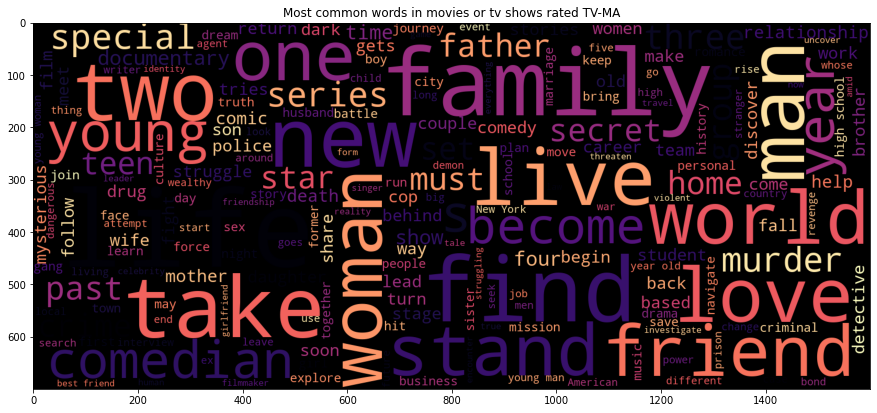

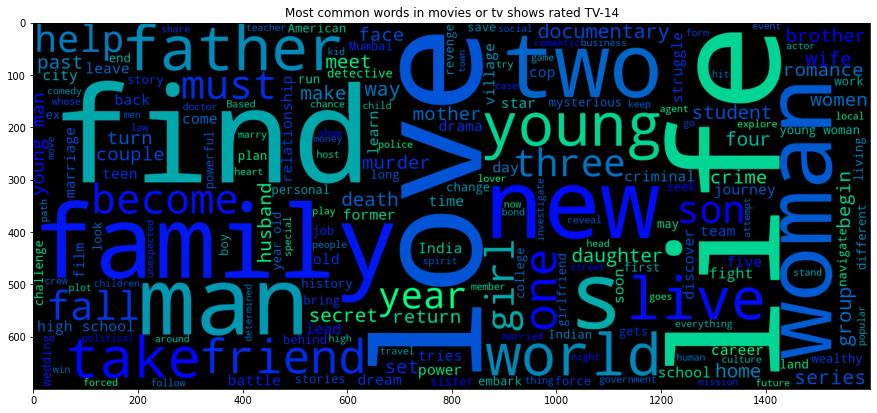

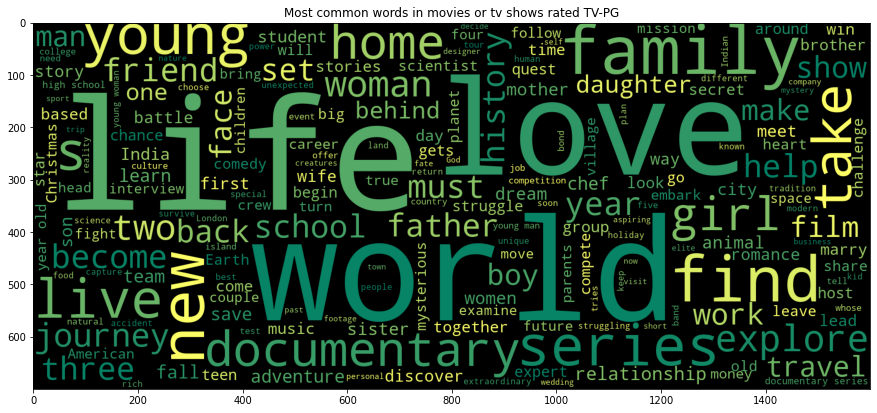

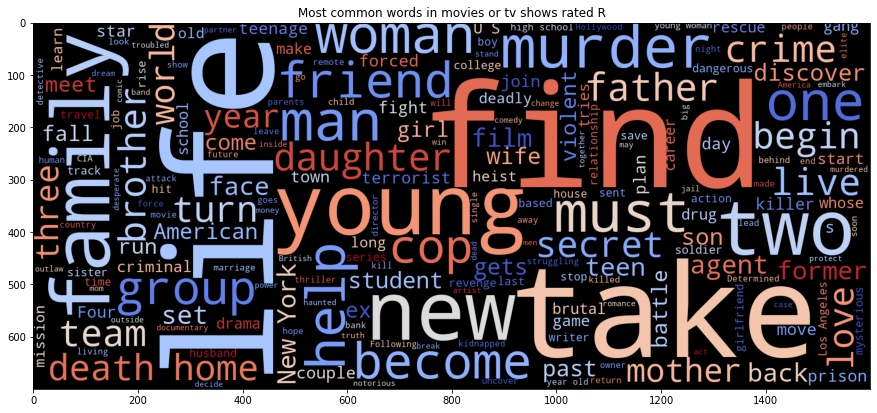

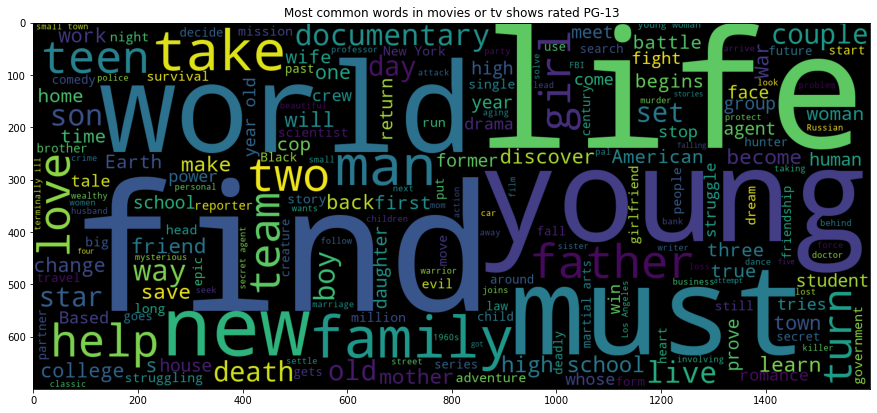

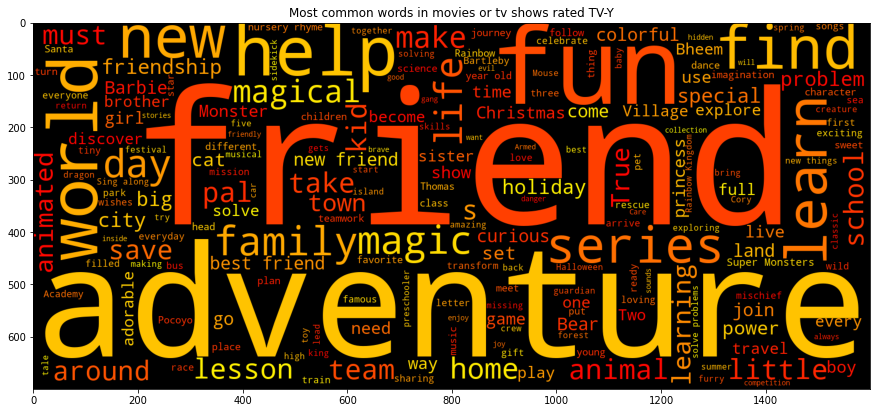

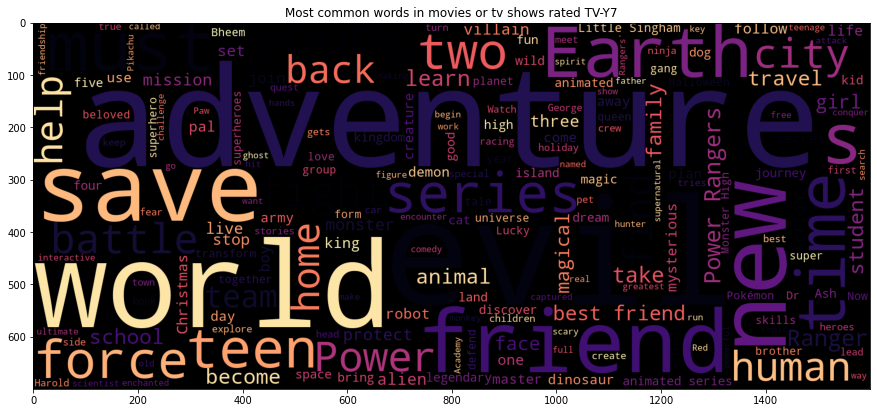

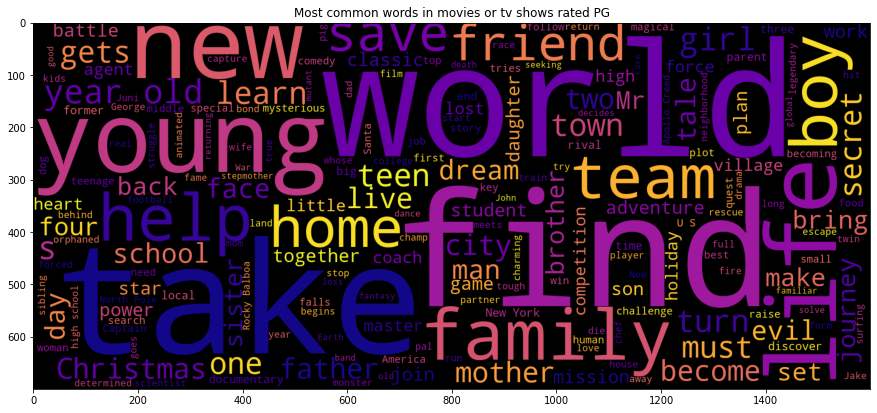

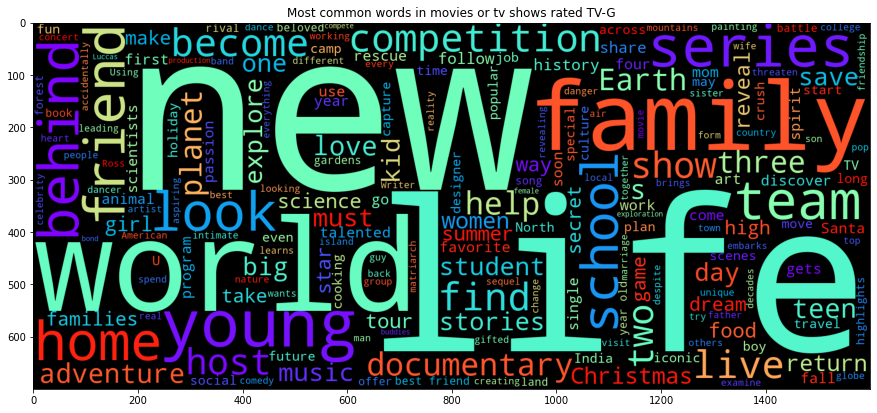

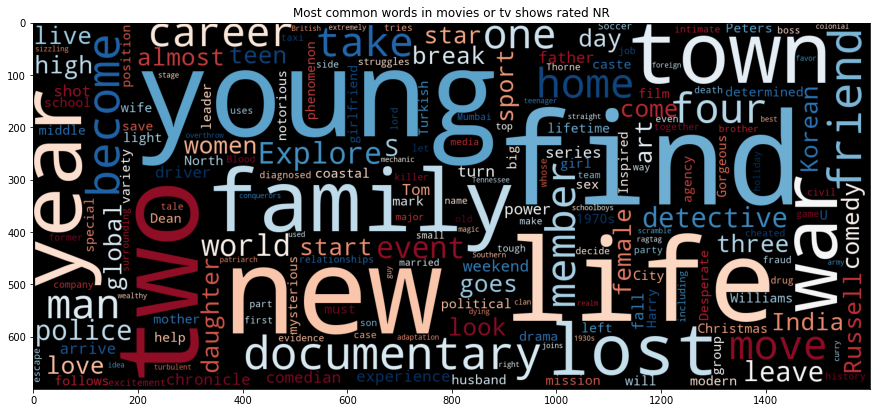

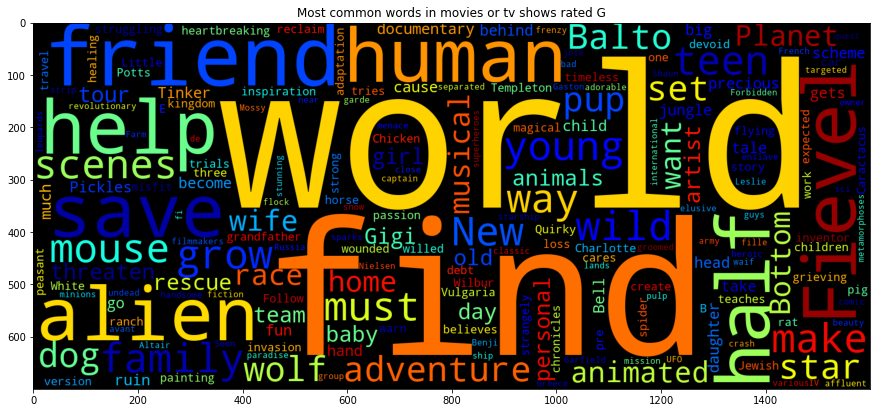

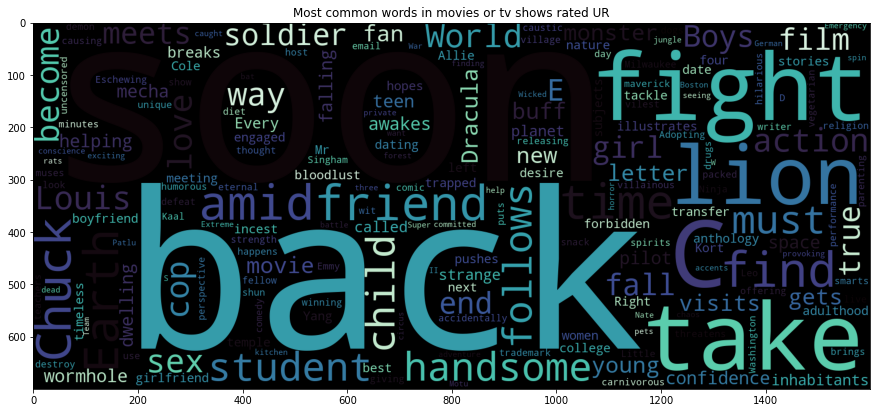

In [18]:
from wordcloud import WordCloud
for label, cmap in zip(['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y', 'TV-Y7', 'PG', 'TV-G', 'NR', 'G', 'UR'],['magma', 'winter', 'summer', 'coolwarm', 'viridis', 'autumn', 'magma','plasma', 'rainbow', 'RdBu', 'jet', 'mako']):
    text = df.query("rating ==@label")['description'].str.cat(sep='')
    plt.figure(figsize=(15, 10))
    wc = WordCloud(height=700, width=1600, background_color="black", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.title(f"Most common words in movies or tv shows rated {label}")
    plt.show()



So here,we are going to trim our dataset into 3 columns that are necessary to make a recommendation.

In [19]:
# creating a copy of our dataset
data = df.copy()
# spliciing our dataset into 3 columns
data[['title', 'genres', 'description']]

title  \
0                                            3%   
1                                          1920   
2                                    3 Heroines   
3     Blue Mountain State: The Rise of Thadland   
4                                Blue Planet II   
...                                         ...   
7782                                 Blown Away   
7783                              Blue Exorcist   
7784                  Blue Is the Warmest Color   
7785                               Blue Jasmine   
7786                                   Blue Jay   

                                                 genres  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1        Horror Movies, International Movies, Thrillers   
2           Dramas, International Movies, Sports Movies   
3                                              Comedies   
4     British TV Shows, Docuseries, Science & Nature TV   
...                                                 ...   
7782                 International TV Shows, Reality TV   
7783               Anime Series, International TV Shows   
7784   Dramas, Independent Movies, International Movies   
7785               Comedies, Dramas, Independent Movies   
7786        Dramas, Independent Movies, Romantic Movies   

                                            description  
0     In a future where the elite inhabit an island ...  
1     An architect and his wife move into a castle t...  
2     Three Indonesian women break records by becomi...  
3     New NFL star Thad buys his old teammates' belo...  
4     This sequel to the award-winning nature series...  
...                                                 ...  
7782  Ten master artists turn up the heat in glassbl...  
7783  Determined to throw off the curse of being Sat...  
7784  Determined to fall in love, 15-year-old Adele ...  
7785  The high life leads to high anxiety for a fash...  
7786  Two former high school sweethearts unexpectedl...  

[7787 rows x 3 columns]

here we are going to apply tfidvectorizer on our text which works by looking at a normalized count where each word count is divided by the number of documents this word appears in.  we are going to remove stopwords in the text which are common words such as interjections, articles, conjuctions etc.

In [20]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
# normalizing our data
tfidf_matrix_ds = tfidf.fit_transform(data['description'])
#
tfidf_matrix_genre = tfidf.fit_transform(df['genres'])
#linear kernel will help us to separate features that have been normalized
cosine_sim_dec = linear_kernel(tfidf_matrix_ds, tfidf_matrix_ds)
#
cosine_sim_genre = linear_kernel(tfidf_matrix_genre, tfidf_matrix_genre)
cosine_sim_genre



array([[1.        , 0.04409358, 0.10648054, ..., 0.12275165, 0.07783267,
        0.06273466],
       [0.04409358, 1.        , 0.34221055, ..., 0.39450316, 0.1728624 ,
        0.27866095],
       [0.10648054, 0.34221055, 1.        , ..., 0.52812816, 0.31039449,
        0.39559459],
       ...,
       [0.12275165, 0.39450316, 0.52812816, ..., 1.        , 0.79462418,
        0.80811313],
       [0.07783267, 0.1728624 , 0.31039449, ..., 0.79462418, 1.        ,
        0.71519402],
       [0.06273466, 0.27866095, 0.39559459, ..., 0.80811313, 0.71519402,
        1.        ]])

In [21]:
# creating a series of indices of movies and shows
indices = pd.Series(data.index, index=data['title'])
indices

title
3%                                              0
1920                                            1
3 Heroines                                      2
Blue Mountain State: The Rise of Thadland       3
Blue Planet II                                  4
                                             ... 
Blown Away                                   7782
Blue Exorcist                                7783
Blue Is the Warmest Color                    7784
Blue Jasmine                                 7785
Blue Jay                                     7786
Length: 7787, dtype: int64

below is a function that we will use to make recommendations on a movie or show that a user prefers based on the content that is in the movie.this will depend on genre columns.

In [22]:
def get_recommedations(title):
    idx = indices[title]
    sim_scores_desc = list(enumerate(cosine_sim_dec[idx]))
    sim_scores_desc = sorted(sim_scores_desc, key= lambda x : x[1], reverse=True)
    sim_scores_desc = sim_scores_desc[1:11]
    movie_indices = [i[0] for i in sim_scores_desc]
    return df[['title', 'description', 'genres']].iloc[movie_indices]

In [23]:
# getting recommendations
get_recommedations("Blue Jasmine")

title  \
48                               BONDING   
4172                          Panic Room   
765                 Degrassi: Next Class   
4262  Pete Davidson: Alive From New York   
2954                        Little Boxes   
1657                            Good Sam   
235                               5 to 7   
3810                   Natural Selection   
4636     Restless Creature: Wendy Whelan   
5905                       The Dream Job   

                                            description  \
48    A New York City grad student moonlighting as a...   
4172  A woman and her daughter are caught in a game ...   
765   Degrassi's next generation of high-tech newbie...   
4262  Comedian and "SNL" star Pete Davidson drops a ...   
2954  After moving from New York City to a small tow...   
1657  A curious reporter finds love while pursuing t...   
235   A young novelist's life is turned upside down ...   
3810  As the new kid, a shy high school senior finds...   
4636  After 30 years with the New York City Ballet, ...   
5905  A mysterious, wealthy man offers three people ...   

                                                genres  
48                              TV Comedies, TV Dramas  
4172                                         Thrillers  
765   International TV Shows, TV Dramas, Teen TV Shows  
4262                                   Stand-Up Comedy  
2954              Comedies, Dramas, Independent Movies  
1657                  Children & Family Movies, Dramas  
235                  Comedies, Dramas, Romantic Movies  
3810                        Dramas, Independent Movies  
4636                                     Documentaries  
5905                 International TV Shows, TV Dramas

In [24]:
#getting recommedations using genre content
def get_recommedations_genre(title):
    idx = indices[title]
    sim_scores_genre = list(enumerate(cosine_sim_genre[idx]))
    sim_scores_genre = sorted(sim_scores_genre, key=lambda x : x[1], reverse=True)
    sim_scores_genre = sim_scores_genre[1:20]
    movie_indices = [i[0] for i in sim_scores_genre]
    return df[['title', 'genres','description']].iloc[movie_indices]

In [25]:
get_recommedations_genre('Stranger Things').T

1876  \
title                                                    Helix   
genres            TV Horror, TV Mysteries, TV Sci-Fi & Fantasy   
description  While investigating a possible outbreak at an ...   

                                                          3858  \
title                                              Nightflyers   
genres            TV Horror, TV Mysteries, TV Sci-Fi & Fantasy   
description  With humankind's future at stake, a group of s...   

                                                          5375  \
title                                          Stranger Things   
genres            TV Horror, TV Mysteries, TV Sci-Fi & Fantasy   
description  When a young boy vanishes, a small town uncove...   

                                                          5620  \
title                                                 The 4400   
genres            TV Dramas, TV Mysteries, TV Sci-Fi & Fantasy   
description  4400 people who vanished over the course of fi...   

                                                          6291  \
title                                           The Messengers   
genres            TV Dramas, TV Mysteries, TV Sci-Fi & Fantasy   
description  A group of strangers who are killed by a myste...   

                                                          6352  \
title                                                   The OA   
genres            TV Dramas, TV Mysteries, TV Sci-Fi & Fantasy   
description  Seven years after vanishing from her home, a y...   

                                                          6639  \
title                                      The Vampire Diaries   
genres            TV Dramas, TV Mysteries, TV Sci-Fi & Fantasy   
description  Trapped in adolescent bodies, feuding vampire ...   

                                                          6621  \
title                                     The Umbrella Academy   
genres       TV Action & Adventure, TV Mysteries, TV Sci-Fi...   
description  Reunited by their father's death, estranged si...   

                                                          7206  \
title                                              Warrior Nun   
genres       TV Action & Adventure, TV Mysteries, TV Sci-Fi...   
description  After waking up in a morgue, an orphaned teen ...   

                                                          3095  \
title                                     Love, Death & Robots   
genres       TV Action & Adventure, TV Horror, TV Sci-Fi & ...   
description  Terrifying creatures, wicked surprises and dar...   

                                                          318   \
title                                                  Charmed   
genres                          TV Dramas, TV Sci-Fi & Fantasy   
description  After their mother’s tragic death, a trio of s...   

                                                          1659  \
title                                               Good Witch   
genres                          TV Dramas, TV Sci-Fi & Fantasy   
description  Raising her daughter in a small town, an encha...   

                                                          6262  \
title                                            The Magicians   
genres                          TV Dramas, TV Sci-Fi & Fantasy   
description  When grad student Quentin Coldwater enters a c...   

                                                          2113  \
title                                  I Am Not Okay With This   
genres             TV Comedies, TV Dramas, TV Sci-Fi & Fantasy   
description  Angsty Syd navigates high school awkwardness, ...   

                                                          3747  \
title                             Mystery Science Theater 3000   
genres                        TV Comedies, TV Sci-Fi & Fantasy   
description  Hosts Joel and Mike and their robot companions...   

                                                          3748  \
title            

wow, it seems that using genre to recommend movies works better.